In [68]:
# Perform Fisher Discriminant Analysis on pima-indians-diabetes.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fields description follow:
# A. preg = Number of times pregnant
# B. plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# C. pres = Diastolic blood pressure(mm Hg)
# D. skin = Triceps skin fold thickness(mm)
# E. test = 2-Hour serum insulin(mu U/ml)
# F. mass = Body mass index(weight in kg/(height in m) ^ 2)
# g. pedi = Diabetes pedigree function
# H. age = Age(years)

# Read the data
df = pd.read_csv('pima-indians-diabetes.csv', header = None, names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])

# Split the data into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA().fit(X_train, y_train)
# predict the test set
y_pred = lda.predict(X_test)
# get the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8246753246753247


In [70]:
# linear discriminant analysis classifier without using sklearn
class LDAManual:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None
        
    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        # within class scatter matrix
        S_W = np.zeros((n_features, n_features))
        # between class scatter matrix
        S_B = np.zeros((n_features, n_features))
        # mean of all samples
        mean_overall = np.mean(X, axis = 0)
        for c in class_labels:
            # get the samples for each class
            X_c = X[y == c]
            # mean of each class
            mean_c = np.mean(X_c, axis = 0)
            # scatter matrix for each class
            S_W += (X_c - mean_c).T.dot((X_c - mean_c))
            # number of samples in each class
            n_c = X_c.shape[0]
            # mean difference
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff).dot(mean_diff.T)
        # eigenvalues and eigenvectors
        A = np.linalg.inv(S_W).dot(S_B)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # store the eigenvectors
        eigenvectors = eigenvectors.T
        # sort the eigenvectors by decreasing eigenvalues
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store the first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project the data
        return np.dot(X, self.linear_discriminants.T)

    def predict(self, X):
        # project the data
        X = self.transform(X)
        return np.argmax(X, axis = 1)

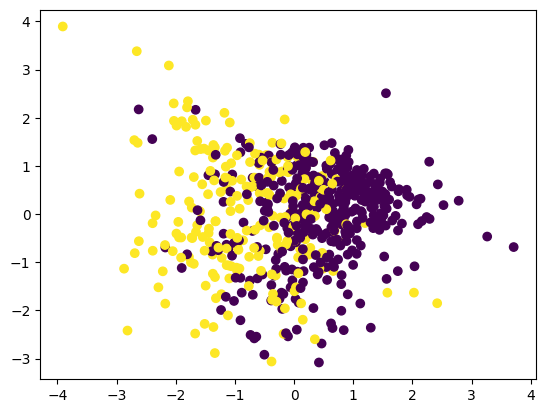

In [71]:
reducer=LDAManual(n_components=2)
reducer.fit(X_train,y_train)
X_train_lda=reducer.transform(X_train)
#plot the data
plt.scatter(X_train_lda[:,0],X_train_lda[:,1],c=y_train)
plt.show()


In [72]:
#predict the test set
y_pred=reducer.predict(X_test)
# get the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.6623376623376623


In [73]:
# Perform Decision Tree classification
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
# predict the test set
y_pred = classifier.predict(X_test)
# get the accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7597402597402597


In [77]:
#perform LDA using sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train_lda = lda.fit_transform(X_train, y_train)

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train_lda, y_train)
# predict the test set
y_pred = classifier.predict(lda.transform(X_test))
# get the accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7792207792207793


Higher separation after LDA, so model has general higher accuracy.